# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import argparse
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from IPython.display import display
from torchvision.models import resnet18, resnet50
from tqdm.notebook import tqdm

from util import show_imarray
from dataset import (
    get_dloader,
    normalize_hw,
    normalize_hw_mask,
    normalize_inv_hw,
    normalize_inv_hw_mask,
    HWSetNoise
)

In [3]:
data_dir = "../data"

In [4]:
dset = HWSetNoise(data_dir, 'val')

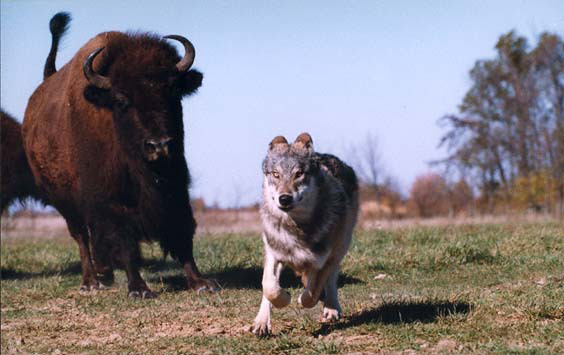

In [150]:
imgs, labels, masks, noise = dset[1]
imgs

In [151]:
imgs = np.array(imgs)

# Creating a W

In [152]:
from skimage.draw import line

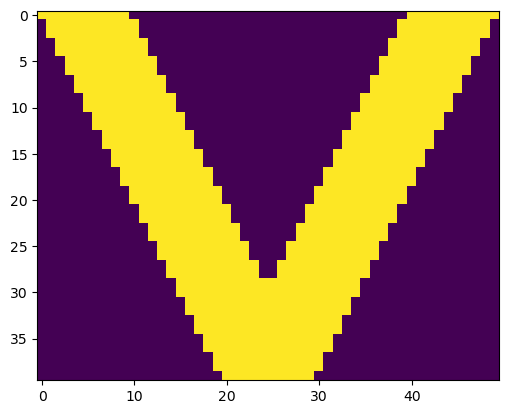

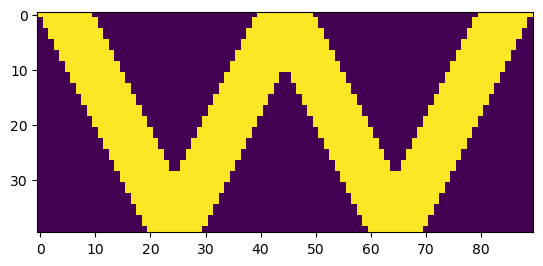

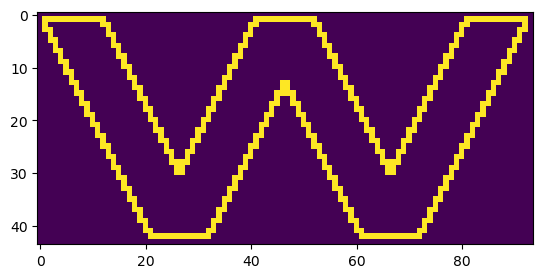

In [153]:
size = 40
width = size // 4
base = np.zeros((size, size + width)).astype(bool)
# base = np.ones(20)

rr, cc = line(0, 0, size-1, size // 2)
for i in range(width):
    base[rr, cc+i] = 1

base |= base[:, ::-1]
w_im = np.hstack((base, np.zeros((size, size)))).astype(bool)
w_im[:, -size - width:] |= base

# plt.imshow(np.diag(np.ones(20)))
plt.imshow(base)
plt.show()
plt.imshow(w_im)
plt.show()

ol_size = size // 40
w_im = np.pad(w_im, 2 * ol_size)
outline = binary_dilation(w_im, footprint=[(np.ones((3, 3)), ol_size), ]) ^ w_im
plt.imshow(outline)

In [157]:
xo, yo = imgs.shape[0] // 50, imgs.shape[1] // 50
imgs[xo:w_im.shape[0] + xo, yo:w_im.shape[1] + yo][w_im] = 255
imgs[xo:w_im.shape[0] + xo, yo:w_im.shape[1] + yo][outline] = 0

In [155]:
imgs.shape

(355, 564, 3)

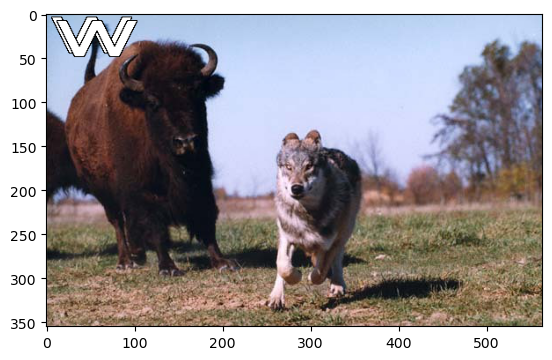

In [158]:
plt.imshow(imgs)